In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer


import datetime
datetime.datetime.strptime

import preprocessor as p
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/alessandro/Downloads/venezuela_201906_1_tweets_csv_hashed.csv')


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
venezuela_tweets = pd.read_csv('/Users/alessandro/Downloads/venezuela_201906_1_tweets_csv_hashed.csv')

In [4]:
tweets_mask = data['is_retweet'] == False
tweets = data[tweets_mask]

tweets_english = tweets[tweets['tweet_language'] == 'en']

In [5]:
em_data = pd.read_csv('/Users/alessandro/Downloads/andbrainDataSet108.csv')
em_data.head()

,word,disgust,surprise,neutral,anger,sad,happy,fear
0,Abuse,0.001099,0.001099,0.001099,0.141758,0.001099,0.001099,0.001099
1,Aggravate,0.001099,0.001099,0.001099,0.141758,0.001099,0.001099,0.001099
2,Agitate,0.001099,0.001099,0.001099,0.141758,0.001099,0.001099,0.001099
3,Agony,0.001099,0.001099,0.001099,0.141758,0.001099,0.001099,0.001099
4,Annoy,0.001099,0.001099,0.001099,0.141758,0.001099,0.001099,0.001099


In [6]:
# clean up the word column
em_data["word"] = em_data.word.str.strip().str.lower()

# remove duplicates
em_data = em_data.groupby('word').mean()

In [7]:
len(em_data)

23634

# Reading emotions set. Quickly preprocessing


In [8]:
def remove_symbols(word, symbol_set):
    
    '''
    Removing symbols from word
    '''
    return ''.join(char for char in word 
                    if char not in symbol_set)

In [9]:

string.punctuation

punct = set(string.punctuation)
punct.remove('@')
punct.remove('#')
punct.add('🇺🇸')
punct.add('🤢')

lemmer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

tweets_english['tweet_text'] = tweets_english['tweet_text'].apply(lambda x: x.lower())
tweets_english['tweet_text'] = tweets_english['tweet_text'].apply(lambda x: remove_symbols(x, punct))
tweets_english['tweet_text'] = tweets_english['tweet_text'].apply(lambda x: re.sub(r'https?:\/\/.*\/\w*', '', x))
tweets_english['tweet_text'] = tweets_english['tweet_text'].apply(lambda x: lemmer.lemmatize(x))
tweets_english['tweet_text'] = tweets_english['tweet_text'].apply(lambda x: stemmer.stem(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [10]:
tweets_english.tweet_text.sample(3)


461412    watch kevin mccarthy warns the first thing dem...
62182     shock report election cyberattacks traced… we ...
231614    alabama about to begin brutal new rule for tea...
Name: tweet_text, dtype: object

In [11]:
vectorizer = CountVectorizer(stop_words='english', vocabulary = em_data.index)
vectorizer.fit(tweets_english.tweet_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None,
                vocabulary=Index(['a', 'aa', 'aardvarkartglass', 'aaron', 'ab', 'aback', 'abagail',
       'abah', 'abandon', 'abandoned',
       ...
       'zoned', 'zones', 'zoning', 'zoo', 'zoom', 'zoomed', 'zooming',
       'zoophiliac', 'zoos', 'zouk'],
      dtype='object', name='word', length=23634))

In [12]:
X = vectorizer.transform(tweets_english.tweet_text)


In [13]:
X

<494275x23634 sparse matrix of type '<class 'numpy.int64'>'
	with 2817613 stored elements in Compressed Sparse Row format>

In [14]:
features = vectorizer.get_feature_names()
features[:10]

# features = vectorizer.get_feature_names()
# features[0:10]

['a',
 'aa',
 'aardvarkartglass',
 'aaron',
 'ab',
 'aback',
 'abagail',
 'abah',
 'abandon',
 'abandoned']

In [15]:
em_data.shape


(23634, 7)

In [16]:
(em_data.index == vectorizer.get_feature_names()).all()


True

In [17]:
em_data.values.shape

(23634, 7)

In [18]:
X.shape

(494275, 23634)

In [19]:
em_freq_np = X @ em_data.values

In [20]:
type(em_freq_np)

numpy.ndarray

In [21]:
em_freq_np.shape


(494275, 7)

In [22]:
em_freq_df = pd.DataFrame.from_records(em_freq_np)

In [23]:
em_freq_df.columns = em_data.columns

In [24]:
em_freq_df.head()

,disgust,surprise,neutral,anger,sad,happy,fear
0,0.037122,0.071642,0.038536,0.156016,0.083933,0.131350,0.097009
1,0.012486,0.064457,0.013908,0.269721,0.102912,0.060459,0.111345
2,0.018078,0.168943,0.018078,0.246357,0.180058,0.152333,0.163687
3,0.011591,0.089000,0.061485,0.152828,0.098354,0.043054,0.173494
4,0.028409,0.159903,0.028409,0.041396,0.179383,0.044643,0.088474


In [25]:
em_freq_df.shape

(494275, 7)

# Histogram of Happiness

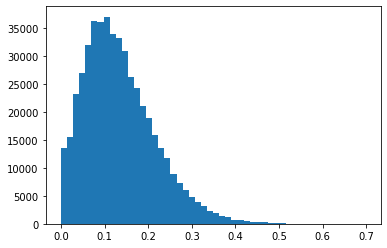

In [26]:
plt.hist( em_freq_np[:,5], bins=50 )
plt.show()


# Preparing Data for Plotting Time Series
1. Subsetting original set to only include timestamp and tweet text.
2. Concantenating With Data Frame containing time data.

In [27]:
tweet_time = (tweets_english[['tweet_text','tweet_time']]).reset_index(drop = True)

In [28]:
tweet_time.head(3), tweet_time.shape

(                                          tweet_text        tweet_time
 0  truth about “right to healthcare” every lib ne...  2017-03-13 13:27
 1  breaking air force makes tragic announcement p...  2017-11-21 20:11
 2  happening now disney facing a scandal so catas...  2018-07-20 18:22,
 (494275, 2))

In [29]:
emotions_frequencies = pd.concat([tweet_time, em_freq_df], axis = 1)
emotions_frequencies.head()

,tweet_text,tweet_time,disgust,surprise,neutral,anger,sad,happy,fear
0,truth about “right to healthcare” every lib ne...,2017-03-13 13:27,0.037122,0.071642,0.038536,0.156016,0.083933,0.131350,0.097009
1,breaking air force makes tragic announcement p...,2017-11-21 20:11,0.012486,0.064457,0.013908,0.269721,0.102912,0.060459,0.111345
2,happening now disney facing a scandal so catas...,2018-07-20 18:22,0.018078,0.168943,0.018078,0.246357,0.180058,0.152333,0.163687
3,another stupid gun control cartoon from the le...,2017-11-07 11:36,0.011591,0.089000,0.061485,0.152828,0.098354,0.043054,0.173494
4,➡️ 90 pounds of cocaine found on ship owned by...,2017-03-24 13:37,0.028409,0.159903,0.028409,0.041396,0.179383,0.044643,0.088474


# Plotting Emotion Detection Time Series

DF's for emotions

In [30]:
disgust = emotions_frequencies[['tweet_time','disgust']]
disgust.head(2)

,tweet_time,disgust
0,2017-03-13 13:27,0.037122
1,2017-11-21 20:11,0.012486


In [31]:
surprise = emotions_frequencies[['tweet_time','surprise']]
surprise.head(2)

,tweet_time,surprise
0,2017-03-13 13:27,0.071642
1,2017-11-21 20:11,0.064457


In [32]:
neutral = emotions_frequencies[['tweet_time','neutral']]
neutral.head(2)

,tweet_time,neutral
0,2017-03-13 13:27,0.038536
1,2017-11-21 20:11,0.013908


In [33]:
anger= emotions_frequencies[['tweet_time', 'anger' ]]
anger.head(2)

,tweet_time,anger
0,2017-03-13 13:27,0.156016
1,2017-11-21 20:11,0.269721


In [34]:

sad= emotions_frequencies[['tweet_time', 'sad' ]]
sad.head(2)

,tweet_time,sad
0,2017-03-13 13:27,0.083933
1,2017-11-21 20:11,0.102912


In [35]:
happy= emotions_frequencies[['tweet_time', 'happy' ]]
happy.head(2)

,tweet_time,happy
0,2017-03-13 13:27,0.131350
1,2017-11-21 20:11,0.060459


In [36]:
fear= emotions_frequencies[['tweet_time', 'fear' ]]
fear.head(2)

,tweet_time,fear
0,2017-03-13 13:27,0.097009
1,2017-11-21 20:11,0.111345


In [37]:
disgust_time = pd.DataFrame(pd.to_datetime( disgust["tweet_time"] ))
disgust_time['disgust'] = disgust['disgust']
disgust_time.set_index("tweet_time", inplace = True)
disgust_time.head(2)

# disgust_time = pd.DataFrame(pd.to_datetime(disgust['tweet_time']))
# disgust_time['disgust'] = disgust['disgust']
# disgust_time.set_index('tweet_time', inplace=True)
# disgust_time.head(2)

,disgust
tweet_time,
2017-03-13 13:27:00,0.037122
2017-11-21 20:11:00,0.012486


In [38]:
surprise_time = pd.DataFrame(pd.to_datetime( surprise["tweet_time"] ))
surprise_time['surprise'] = surprise['surprise']
surprise_time.set_index("tweet_time", inplace = True)
surprise_time.head(2)

# surprise_time = pd.DataFrame(pd.to_datetime(surprise['tweet_time']))
# surprise_time['surprise'] = surprise['surprise']
# surprise_time.set_index('tweet_time',inplace=True)
# surprise_time.head(2)

,surprise
tweet_time,
2017-03-13 13:27:00,0.071642
2017-11-21 20:11:00,0.064457


In [39]:
neutral_time = pd.DataFrame(pd.to_datetime(neutral['tweet_time']))
neutral_time['neutral'] = neutral['neutral']
neutral_time.set_index('tweet_time',inplace=True)
neutral_time.head(2)

,neutral
tweet_time,
2017-03-13 13:27:00,0.038536
2017-11-21 20:11:00,0.013908


In [40]:
anger_time = pd.DataFrame(pd.to_datetime( anger["tweet_time"] ))
anger_time['anger'] = anger['anger']
anger_time.set_index("tweet_time", inplace = True)
anger_time.head(2)

,anger
tweet_time,
2017-03-13 13:27:00,0.156016
2017-11-21 20:11:00,0.269721


In [41]:
sad_time = pd.DataFrame(pd.to_datetime( sad["tweet_time"] ))
sad_time['sad'] = sad['sad']
sad_time.set_index("tweet_time", inplace = True)
sad_time.head(2)

,sad
tweet_time,
2017-03-13 13:27:00,0.083933
2017-11-21 20:11:00,0.102912


In [42]:
happy_time = pd.DataFrame(pd.to_datetime( happy["tweet_time"] ))
happy_time['happy'] = happy['happy']
happy_time.set_index("tweet_time", inplace = True)
happy_time.head(2)

,happy
tweet_time,
2017-03-13 13:27:00,0.131350
2017-11-21 20:11:00,0.060459


In [43]:
fear_time = pd.DataFrame(pd.to_datetime( fear["tweet_time"] ))
fear_time['fear'] = fear['fear']
fear_time.set_index("tweet_time", inplace = True)
fear_time.head(2)

,fear
tweet_time,
2017-03-13 13:27:00,0.097009
2017-11-21 20:11:00,0.111345


# Monthly Emotions Detection. Cumulative

In [44]:
monthly_disgust = disgust_time['disgust'].resample('M').sum()

monthly_surprise = surprise_time['surprise'].resample('M').sum()

monthly_neutral = neutral_time['neutral'].resample('M').sum()

monthly_anger = anger_time['anger'].resample('M').sum()

monthly_sad = sad_time['sad'].resample('M').sum()

monthly_happy = happy_time['happy'].resample('M').sum()

monthly_fear = fear_time['fear'].resample('M').sum()





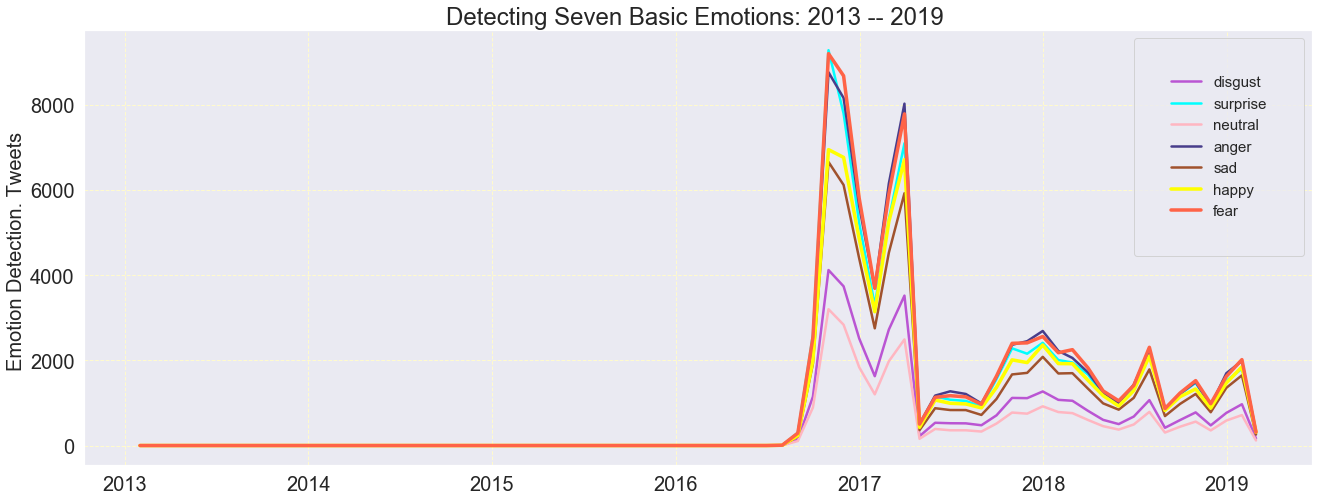

In [52]:
plt.figure(figsize=(22,8))
sns.set(style="darkgrid")
plt.plot(monthly_disgust,  c = 'mediumorchid', linewidth=2.5, label = 'disgust')

plt.plot(monthly_surprise,  c = 'cyan', linewidth=2.5, label = 'surprise')
plt.plot(monthly_neutral,  c = 'lightpink', linewidth=2.5, label = 'neutral')
plt.plot(monthly_anger,  c = 'darkslateblue', linewidth=2.5, label = 'anger')
plt.plot(monthly_sad,  c = 'sienna', linewidth=2.5, label = 'sad')
plt.plot(monthly_happy,  c = 'yellow', linewidth=3.5, label = 'happy')
plt.plot(monthly_fear,  c = 'tomato', linewidth=3.5, label = 'fear')

plt.legend(borderpad=2.5, fontsize = 15, loc='upper right')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Emotion Detection. Tweets ', fontsize = 20)
plt.grid(c = 'lemonchiffon', linestyle = '--')
plt.title('Detecting Seven Basic Emotions: 2013 -- 2019 ', fontsize = 24)

plt.show()






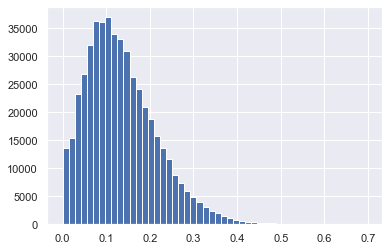

In [46]:
# plt.hist( em_freq_np[:,5], bins=50 )
# plt.show()

plt.hist( em_freq_np[:,5], bins=50)
plt.show()

In [47]:
em_freq_np.shape
#percentege of emotion associated with tweet

(494275, 7)

In [48]:
import seaborn as sns


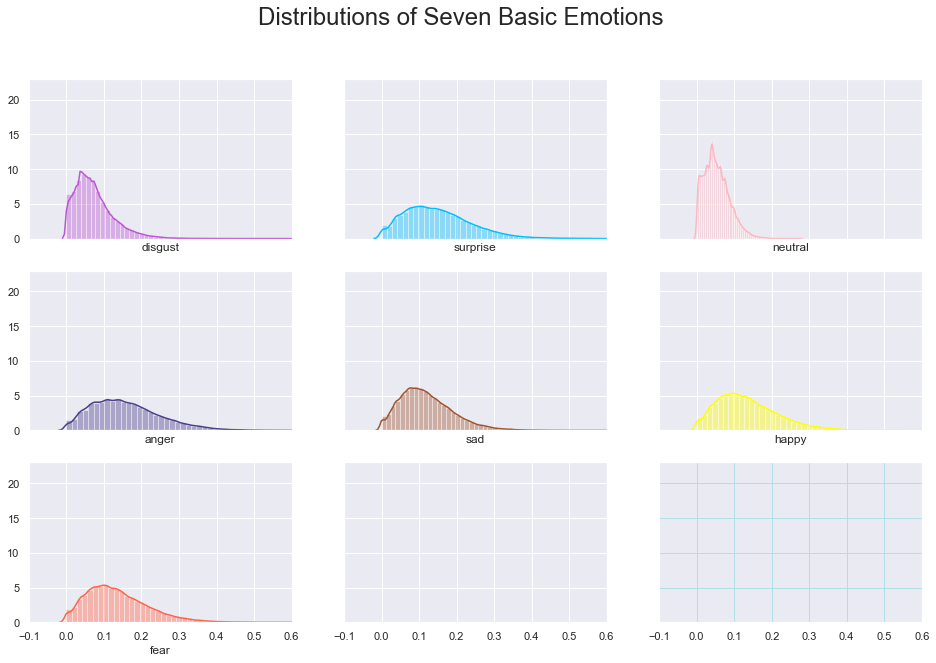

In [49]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(16,10), sharex=True, sharey=True)
fig.suptitle('Distributions of Seven Basic Emotions', fontsize = 24)



sns.set()


sns.distplot(em_freq_np[:,0], ax = axs[0, 0], bins = 50, axlabel = 'disgust', color='mediumorchid') 
sns.distplot(em_freq_np[:,1], ax = axs[0, 1], bins = 50, axlabel = 'surprise', color='deepskyblue')
sns.distplot(em_freq_np[:,2], ax = axs[0, 2], bins = 50, axlabel = 'neutral', color = 'lightpink')
sns.distplot(em_freq_np[:,3], ax = axs[1, 0], bins = 50, axlabel = 'anger', color = 'darkslateblue')
sns.distplot(em_freq_np[:,4], ax = axs[1, 1], bins = 50, axlabel = 'sad', color = 'sienna')
sns.distplot(em_freq_np[:,5], ax = axs[1, 2], bins = 50, axlabel = 'happy', color = 'yellow')
sns.distplot(em_freq_np[:,5], ax = axs[2, 0], bins = 50, axlabel = 'fear', color = 'tomato')


plt.grid(c = 'powderblue')
plt.ylim(0, 23)
plt.xlim(-0.1, 0.6)



plt.show()






In [50]:

# norm_monthly_disgust = disgust_time['disgust'].resample('M').sum()/monthly

# norm_monthly_surprise = surprise_time['surprise'].resample('M').sum()/monthly

# norm_monthly_neutral = neutral_time['neutral'].resample('M').sum()/monthly

# norm_monthly_anger = anger_time['anger'].resample('M').sum()/monthly

# norm_monthly_sad = sad_time['sad'].resample('M').sum()/monthly

# norm_monthly_happy = happy_time['happy'].resample('M').sum()/monthly

# norm_monthly_fear = fear_time['fear'].resample('M').sum()/monthly

In [54]:
# # tweet_time = (tweets_english[['tweet_text','tweet_time']]).reset_index(drop = True)
# # Number of Tweets Over Time
# df_time = pd.DataFrame(pd.to_datetime( tweet_time["tweet_time"] ))

# df_time["count"] = 1
# df_time.set_index("tweet_time", inplace = True)

# monthly = df_time['count'].resample('M').sum()


# ['Fuchsia', 'limegreen', 'lightpink', 'red', 'cyan', 'yellow', 'orange' ] 

# plt.figure(figsize=(22,8))
# sns.set(style="darkgrid")
# plt.plot(norm_monthly_disgust,  c = 'Fuchsia', linewidth=2.5, label = 'disgust')

# plt.plot(norm_monthly_surprise,  c = 'limegreen', linewidth=2.5, label = 'surprise')
# plt.plot(norm_monthly_neutral,  c = 'lightpink', linewidth=2.5, label = 'neutral')
# plt.plot(norm_monthly_anger,  c = 'red', linewidth=2.5, label = 'anger')
# plt.plot(norm_monthly_sad,  c = 'cyan', linewidth=2.5, label = 'sad')
# plt.plot(norm_monthly_happy,  c = 'yellow', linewidth=2.5, label = 'happy')
# plt.plot(norm_monthly_fear,  c = 'orange', linewidth=3.5, label = 'fear')


# plt.legend(borderpad=1.4, fontsize = 18, loc='upper right')
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
# plt.ylabel('Emotional Composition. Tweets ', fontsize = 23)
# plt.grid(c = 'lemonchiffon', linestyle = '--')
# plt.title('Detecting Seven Basic Emotions: 2014 -- 2019 \n Normalized ', fontsize = 24)
# # plt.savefig('plots/norm_monthly_tweet_volume.png')

# plt.show()